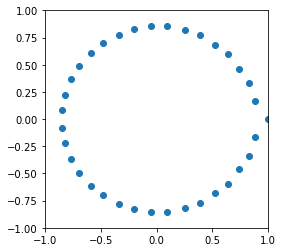

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)


z = 1  # Nombre de zéros

n = 36  # Nombre de numéros (zéros exclus)
M = 100  # Nombre de trajectoires    
N = 10000  # Nombre de tours de roulette
f = np.zeros(n - 1)
f[0], f[1], f[4], f[7], f[10], f[16], f[34] = 6, 9, 22, 24, 26, 60, 37
f /= np.sum(f)

p = lambda d: n / (n + z) / (d + 1)
p_g = 1 - f @ p(np.arange(1, n))

c = np.vectorize(lambda l: f[l - 1:] @ p(np.arange(l, n)))
P = np.vectorize(lambda r: p_g * r + (f * p(np.arange(1, n))) @ (1 / r) ** np.arange(1, n))
Q = np.append(c(np.arange(n - 1, 0, -1)), -p_g)
x = np.roots(Q)
r = 1 / x

V = np.vander(x)
mu = -np.ones(x.shape) @ np.linalg.inv(V)
mu_real = -np.real(np.exp(np.sum(np.log((1 - x[:-1]) / (x[-1] - x[:-1])))))

q = np.vectorize(lambda k: 1 + np.real(mu @ r ** k))

k_half = 1 + int(np.log(-1 / 2 / mu_real) / np.log(np.real(r[-1])))
k_99 = 1 + int(np.log(-.01 / mu_real) / np.log(np.real(r[-1])))
k = np.arange(1, k_99)
q_k = q(k)

plt.figure(figsize=(4, 4))
plt.scatter(np.real(r), np.imag(r))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()